<a href="https://colab.research.google.com/github/JCaesarLG/ML-Projects/blob/main/Wine_Quality_Classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

DATA EXTRACTION

---

In [ ]:
wine = pd.read_csv(f"/content/drive/MyDrive/Raw_Data/wine_data.csv")
wine.head(2), wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         21000 non-null  float64
 1   volatile_acidity      21000 non-null  float64
 2   citric_acid           21000 non-null  float64
 3   residual_sugar        21000 non-null  float64
 4   chlorides             21000 non-null  float64
 5   free_sulfur_dioxide   21000 non-null  float64
 6   total_sulfur_dioxide  21000 non-null  float64
 7   density               21000 non-null  float64
 8   pH                    21000 non-null  float64
 9   sulphates             21000 non-null  float64
 10  alcohol               21000 non-null  float64
 11  quality               21000 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.9 MB


(   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
 0           11.6              0.58         0.66             2.2      0.074   
 1           10.4              0.61         0.49             2.1      0.200   
 
    free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
 0                 10.0                  47.0   1.0008  3.25       0.57   
 1                  5.0                  16.0   0.9994  3.16       0.63   
 
    alcohol  quality  
 0      9.0        3  
 1      8.4        3  ,
 None)

DATA ANALYSIS

---

In [ ]:
sns.set()

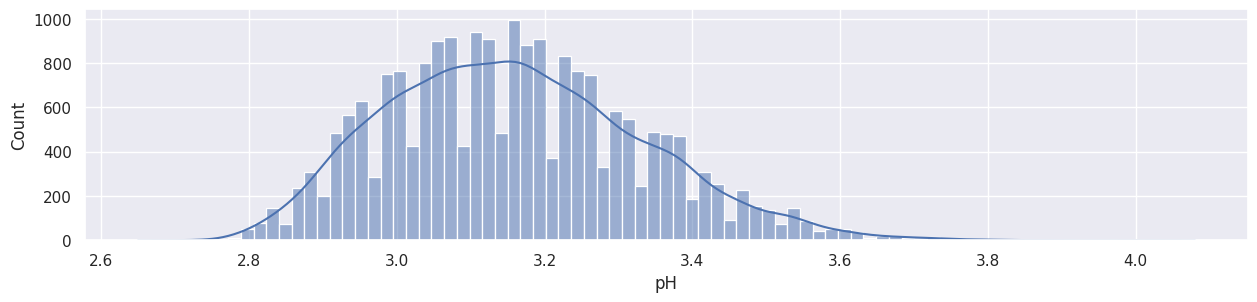

In [ ]:
plt.figure(figsize=(15,3))
sns.histplot(wine['pH'], kde=True,
             kde_kws=dict(cut=3))
plt.show()

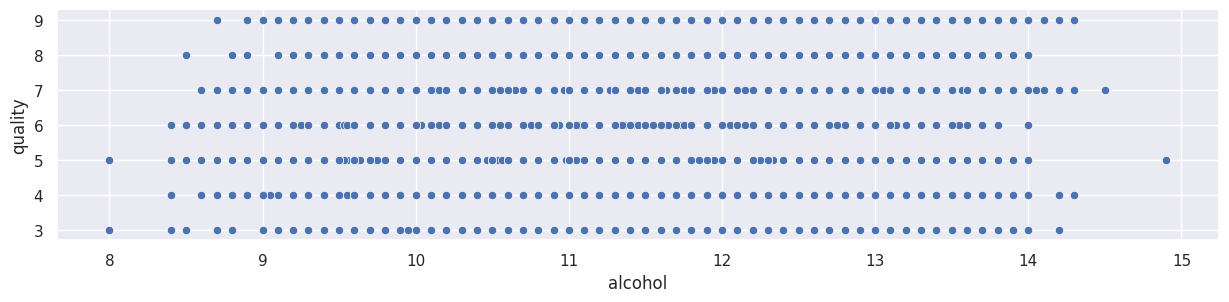

In [ ]:
plt.figure(figsize=(15,3))
sns.scatterplot(data=wine, y='quality', x='alcohol')
plt.show()

In [ ]:
wine['quality'].value_counts()

,count
quality,
3,3000
4,3000
5,3000
6,3000
7,3000
8,3000
9,3000


In [ ]:
corr = wine.corr()

In [ ]:
print(corr['quality'].sort_values(ascending=False).round(3)*100)

quality                 100.0
alcohol                   8.2
free_sulfur_dioxide       5.3
chlorides                 5.3
citric_acid               5.2
residual_sugar            5.0
sulphates                 4.8
density                   3.8
fixed_acidity             3.8
total_sulfur_dioxide      3.6
volatile_acidity          2.0
pH                       -0.2
Name: quality, dtype: float64


In [ ]:
X = wine.drop('quality', axis=1)
y = wine['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
test_pred = clf.predict(X_test)
acc_score = accuracy_score(y_test, test_pred)
print(f"Accuracy score for test is {acc_score}")

Accuracy score for test is 61.476190476190474
